In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/mail-data/mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#replace the null values(NaN) with null string
#pd.notnull(df): checks each element of dataframe to see if it's not null, returns dataframe of same shape where each element is true if element is not null and false otherwise
#df.where(condition, other): used to replace values where the condition is false

mail_data = df.where((pd.notnull(df)),'')

In [4]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail_data.shape

(5572, 2)

In [6]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
mail_data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mail_data['Category'] = le.fit_transform(mail_data['Category'])

In [9]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
x = mail_data['Message']
y = mail_data['Category']

In [11]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [12]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [14]:
print(x.shape, x_train.shape, x_test.shape)

(5572,) (3900,) (1672,)


In [15]:
print(y.shape, y_train.shape, y_test.shape)

(5572,) (3900,) (1672,)


In [16]:
#Perform feature extraction, transform the text data to feature vectors that can be used as input to classification model
#min_df-minimum document frequency, sets a threshold such that any term that appears in fewer documents than this threshold will be ignored in the TF-IDF calculation, For example, if min_df is set to 2, it means that a term must appear in at least 2 documents to be considered for inclusion in the TF-IDF matrix.
#lowercase-a boolean value that indicates whether or not to convert all characters in the input documents to lowercase before further processing.
#stop_words-specify a list of words that should be ignored during the tokenization process.
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

#fit_transform(): It learns parameters from X_train and applies the transformation simultaneously.
#transform(): It doesn't recompute the parameters but applies the same transformation that was learned during the fit_transform() step. This is important because you want the test data to be transformed in the same way as the training data, using the same parameters.

In [17]:
print(x_train)

4914    Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...
2541    They said if its gonna snow, it will start aro...
5323                           Aah bless! How's your arm?
5171                         Oh k. . I will come tomorrow
2532    What's happening with you. Have you gotten a j...
                              ...                        
3185    Good morning pookie pie! Lol hope I didn't wak...
606                             TaKe CaRE n gET WeLL sOOn
552     Hurry up, I've been weed-deficient for like th...
762     We are at grandmas. Oh dear, u still ill? I fe...
3393                      What r u cooking me for dinner?
Name: Message, Length: 3900, dtype: object


In [18]:
print(x_train_features)

  (0, 4031)	0.1465986594485119
  (0, 581)	0.22112630260594676
  (0, 3912)	0.22112630260594676
  (0, 1210)	0.22112630260594676
  (0, 4539)	0.1771697225762067
  (0, 6798)	0.22112630260594676
  (0, 5456)	0.20325364467285276
  (0, 5496)	0.18234397531469984
  (0, 5301)	0.22112630260594676
  (0, 3735)	0.20325364467285276
  (0, 3075)	0.4422526052118935
  (0, 986)	0.4422526052118935
  (0, 2859)	0.4422526052118935
  (1, 738)	0.4040521368901571
  (1, 3280)	0.3849485827533071
  (1, 4787)	0.4040521368901571
  (1, 6184)	0.3450280070434335
  (1, 4685)	0.30607891238449075
  (1, 5744)	0.28320413313178316
  (1, 5599)	0.3237326548471284
  (1, 2878)	0.2595003267121749
  (1, 5243)	0.2454014493301925
  (2, 975)	0.5841246053082482
  (2, 1262)	0.5841246053082482
  (2, 696)	0.5635573537333771
  :	:
  (3895, 2879)	0.23838729062381697
  (3895, 3144)	0.2776136646049962
  (3896, 5635)	0.7279206898631326
  (3896, 1502)	0.6856613371549989
  (3897, 2014)	0.5343735220605506
  (3897, 3204)	0.46591734195028506
  (3897,

In [19]:
y_train.dtype

dtype('int64')

In [20]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train_features,y_train)

LogisticRegression()

In [21]:
prediction1 = model1.predict(x_test_features)

In [25]:
print(prediction1)

[1 0 1 ... 1 0 0]


In [26]:
print(y_test.values)

[1 0 1 ... 1 0 1]


In [22]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, prediction1)*100
print("Accuracy with Logistic Regression: ", accuracy1)

Accuracy with Logistic Regression:  96.05263157894737


In [27]:
from sklearn.naive_bayes import BernoulliNB 
model2 = BernoulliNB()
model2.fit(x_train_features, y_train)

BernoulliNB()

In [28]:
prediction2 = model2.predict(x_test_features)

In [29]:
print(prediction2)

[1 0 1 ... 1 0 0]


In [31]:
print(y_test.values)

[1 0 1 ... 1 0 1]


In [32]:
accuracy2 = accuracy_score(y_test, prediction2)*100
print("Accuracy with Naive Bayes: ", accuracy2)

Accuracy with Naive Bayes:  96.88995215311004


In [33]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train_features,y_train)

SVC()

In [34]:
prediction3 = model3.predict(x_test_features)

In [35]:
print(prediction3)

[1 0 1 ... 1 0 0]


In [36]:
print(y_test.values)

[1 0 1 ... 1 0 1]


In [37]:
accuracy3 = accuracy_score(y_test, prediction3)*100
print("Accuracy with Support Vector Classifier: ", accuracy3)

Accuracy with Support Vector Classifier:  97.78708133971293


In [38]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train_features, y_train)

RandomForestClassifier()

In [39]:
prediction4=model4.predict(x_test_features)

In [41]:
accuracy4=accuracy_score(y_test, prediction4)*100
print("Accuracy with Random Forest Classifier: ", accuracy4)

Accuracy with Random Forest Classifier:  97.00956937799043


In [42]:
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(x_train_features, y_train)

DecisionTreeClassifier()

In [43]:
prediction5=model5.predict(x_test_features)

In [44]:
print(prediction5)

[1 0 1 ... 1 0 0]


In [45]:
print(y_test.values)

[1 0 1 ... 1 0 1]


In [46]:
accuracy5=accuracy_score(y_test, prediction5)*100
print("Accuracy with Decision Trees: ",accuracy5)

Accuracy with Decision Trees:  96.17224880382776


In [48]:
from sklearn.neighbors import KNeighborsClassifier
model6=KNeighborsClassifier()
model6.fit(x_train_features, y_train)

KNeighborsClassifier()

In [49]:
prediction6=model6.predict(x_test_features)

In [50]:
print(prediction5)

[1 0 1 ... 1 0 0]


In [51]:
print(y_test.values)

[1 0 1 ... 1 0 1]


In [52]:
accuracy6=accuracy_score(y_test, prediction6)*100
print("Accuracy with K-Nearest Neighbors: ", accuracy6)

Accuracy with K-Nearest Neighbors:  90.78947368421053


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


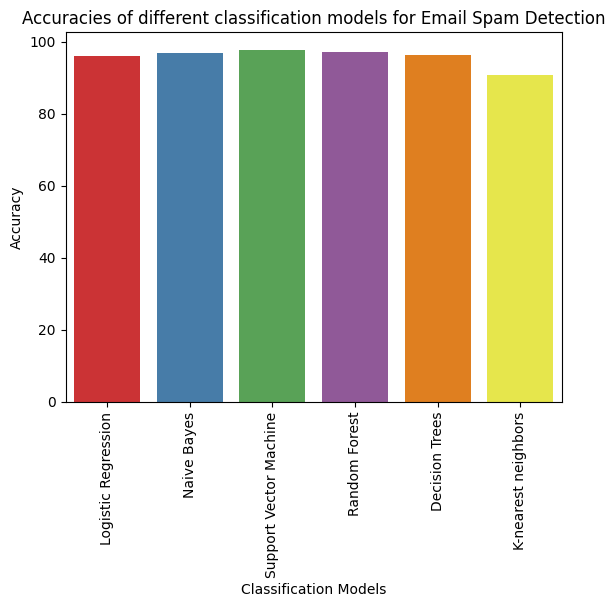

In [73]:
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Decision Trees', 'K-nearest neighbors']
ax = sns.barplot(x=models,y=accuracies, palette="Set1")
ax.set_xticklabels(models, rotation=90)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracies of different classification models for Email Spam Detection')
plt.show()